# Задание 5. 
Решить задачу Коши предложенными методами (задание – 8.6).

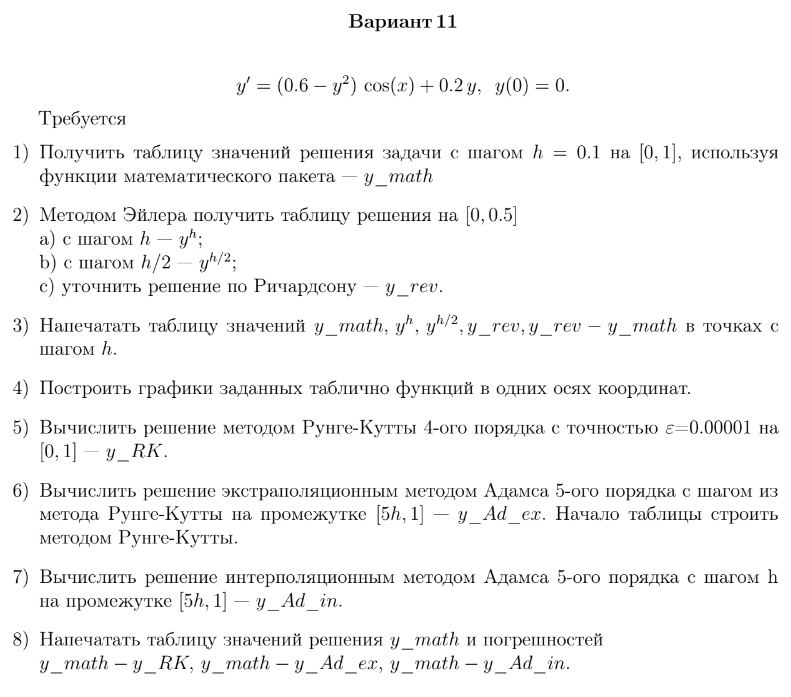

In [68]:
import math
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

def func(x,y):
  return (0.6-y**2)*math.cos(x)+0.2*y

y_math = np.array([0, 0.060382, 0.120656, 0.179560, 0.235978, 0.289011, 0.338020, 0.382629, 0.422700, 0.458291, 0.489599])

a, b = 0, 1
h = 0.1
x = np.arange(a, b + h, h)

print('Точное решение, полученное с помощью Matlab:\n')
dy = pd.DataFrame({'x' : x, 'y_math' : y_math })
dy

Точное решение, полученное с помощью Matlab:



,x,y_math
0,0.0,0.000000
1,0.1,0.060382
2,0.2,0.120656
3,0.3,0.179560
4,0.4,0.235978
5,0.5,0.289011
6,0.6,0.338020
7,0.7,0.382629
8,0.8,0.422700
9,0.9,0.458291


In [69]:
x_0, y_0 = 0.0, 0.0

def Eul(hh):
  x_h = [x_0]
  y_h = [y_0]
  y = y_0
  n = int((b - a) / hh)
  for k in range(1, n+1):
    x = a + k*hh
    y = y + hh*func(x, y)
    x_h.append(x)
    y_h.append(y)
  return pd.DataFrame({'x': x_h, 'y': y_h})

y_h = Eul(h)
y_h_2 = Eul(h/2)

# уточнение по Ричардсону
s = 2
R = (np.array(y_h_2['y'][::2]) - np.array(y_h['y'])) / (2**s - 1)
y_rev = np.array(y_h_2['y'][::2]) + R
y_rev = pd.DataFrame({'x': y_h['x'], 'y' : y_rev})

frame=pd.DataFrame({'x': dy['x'],
                    'y_math': dy['y_math'],
                    'y_h': y_h['y'],
                    'y_h2': np.array(y_h_2['y'][::2]),
                    'y_rev': y_rev['y'],
                    'y_rev - y_math': y_rev['y'] - dy['y_math']})
print('Метод Эйлера:\n')
frame[:6]

Метод Эйлера:



,x,y_math,y_h,y_h2,y_rev,y_rev - y_math
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.1,0.060382,0.059700,0.060068,0.060190,-0.000192
2,0.2,0.120656,0.119349,0.120058,0.120295,-0.000361
3,0.3,0.179560,0.177695,0.178715,0.179055,-0.000505
4,0.4,0.235978,0.233605,0.234910,0.235345,-0.000633
5,0.5,0.289011,0.286143,0.287726,0.288254,-0.000757


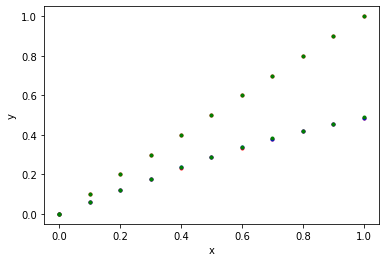

In [70]:
plt.plot(dy['x'], y_h, 'r.')
plt.plot(dy['x'], np.array(y_h_2['y'][::2]), 'b.')
plt.plot(dy['x'], y_rev, 'g.')

plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [71]:
yi = y_0
xi = x_0
RK = pd.DataFrame(columns=['x', 'y'])
RK = RK.append({'x': x_0, 'y': y_0}, ignore_index = True)
for k in range(n-1):
  k1 = h * func(xi, yi)
  k2 = h * func(xi + h/2, yi + k1/2)
  k3 = h * func(xi + h/2, yi + k2/2)
  k4 = h * func(xi + h, yi + k3)
  xi += h
  yi += 1/6 * (k1 + 2 * k2 + 2 * k3 + k4)
  RK = RK.append({'x': xi, 'y': yi}, ignore_index = True)
print("Метод Рунге-Кутта: ")
RK

Метод Рунге-Кутта: 


,x,y
0,0.0,0.000000
1,0.1,0.060382
2,0.2,0.120656
3,0.3,0.179560
4,0.4,0.235978
5,0.5,0.289011
6,0.6,0.338020
7,0.7,0.382629
8,0.8,0.422700
9,0.9,0.458291


In [74]:
def Adams_ex(x, y):
  for i in range(5, len(y)):
    q4 = h*func(x[i-5], y[i-5])
    q3 = h*func(x[i-4], y[i-4])
    q2 = h*func(x[i-3], y[i-3])
    q1 = h*func(x[i-2], y[i-2])
    q0 = h*func(x[i-1], y[i-1])
    
    y[i] = y[i-1] + (1/720)*(1901*q0 - 2774*q1 + 2616*q2 - 1274*q3 + 251*q4)
  
  return y

y_Ad_ex = pd.DataFrame({'x': x, 'y': RK['y']})
y_Ad_ex = Adams_ex(y_Ad_ex['x'], y_Ad_ex['y'])
y_Ad_ex=pd.DataFrame({'x': x, 'y': y_Ad_ex})

print('Экстраполяционный метод Адамса:\n')
y_Ad_ex

Экстраполяционный метод Адамса:



,x,y
0,0.0,0.000000
1,0.1,0.060382
2,0.2,0.120656
3,0.3,0.179560
4,0.4,0.235978
5,0.5,0.289021
6,0.6,0.338042
7,0.7,0.382661
8,0.8,0.422740
9,0.9,0.458333


In [75]:
def Adams_in(x, y):
  for i in range(4, len(y)):
    q_4 = h * func(x[i], y[i])
    q_3 = h * func(x[i - 4], y[i - 4])
    q_2 = h * func(x[i - 3], y[i - 3])
    q_1 = h * func(x[i - 2], y[i - 2])
    q_0 = h * func(x[i - 1], y[i - 1])
    
    y[i] = y[i-1] + (1/720)*(251*q_4 + 646*q_0 - 264*q_1 + 106*q_2 - 19*q_3)
  
  return y

y_Ad_in = pd.DataFrame({'x': x, 'y': RK['y']})
y_Ad_in = Adams_in(y_Ad_ex['x'], y_Ad_in['y'])
y_Ad_in=pd.DataFrame({'x': x, 'y': y_Ad_in})

print('Интерполяционный метод Адамса:\n')
y_Ad_in

Интерполяционный метод Адамса:



,x,y
0,0.0,0.000000
1,0.1,0.060382
2,0.2,0.120656
3,0.3,0.179560
4,0.4,0.235978
5,0.5,0.289010
6,0.6,0.338018
7,0.7,0.382626
8,0.8,0.422698
9,0.9,0.458288


In [78]:
print('Таблица погрешностей\n')
pd.DataFrame({'x': dy['x'],
              'y_math': dy['y_math'],
              'y_math - RK': dy['y_math'] - RK['y'],
              'y_math - y_Ad_ex': dy['y_math'] - y_Ad_ex['y'],
              'y_math - y_Ad_in': dy['y_math'] - y_Ad_in['y'],
 })

Таблица погрешностей



,x,y_math,y_math - RK,y_math - y_Ad_ex,y_math - y_Ad_in
0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
1,0.1,0.060382,-2.649192e-08,-2.649192e-08,-2.649192e-08
2,0.2,0.120656,3.319679e-07,3.319679e-07,3.319679e-07
3,0.3,0.179560,-2.027495e-07,-2.027495e-07,-2.027495e-07
4,0.4,0.235978,-1.106146e-07,-1.106146e-07,4.301918e-07
5,0.5,0.289011,4.077632e-08,-1.043495e-05,1.253493e-06
6,0.6,0.338020,2.753178e-07,-2.177246e-05,2.105987e-06
7,0.7,0.382629,2.441705e-07,-3.229766e-05,2.508641e-06
8,0.8,0.422700,-3.143072e-07,-3.961781e-05,2.153381e-06
9,0.9,0.458291,3.670555e-07,-4.179078e-05,2.832164e-06


*Работу выполнил Пашов Павел, группа 323.*